# 2. Use of conjugate priors

A **conjugate prior** is an algebraic convenience, giving a closed-form expression for the posterior; otherwise, numerical integration may be necessary. 

More information about conjugate priors and tables of cojugate distribution can be found in [wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior)

![conjugate example](../figures/conjugate_priors_example.png)



## Task: 

1. Estimate the mean value of concrete compressive strength ($\theta$)) (estimate of the population mean) from concrete cubes (sample) produced at the same concrete plant. 

    Assume that we know that the concrete compressive strength:
    - Follows a normal distribution.
    - Its standard deviation is known: 5 MPa.
    - Only the mean value ($\theta$) is unknown (to be estimated from a sample).
    - The sample: x = [30.1 28.7 21.2 28.6 25.8 25.1 24.2 27.3, 20.0 34.8] MPa.

2. Estimate the population mean ($\theta$)) from the sample mean (called point estimate in mathematical statistics).
3. Calculate the entire posterior distribution of the mean parameter ($\theta$)).

    - Assume a normally distributed prior on the mean parameter with mean of 40 MPa
    and standard deviation of 100 MPa.
    - Utilize the available closed-form, symbolic solution for this problem (conjugate
    prior).

:::{hint}
:class: dropdown

The compressive strength is normally distributed and its standard deviation σ is known, so if we assume that the prior distribution of the parameter µ (mean of the compressive strength) is normally distributed, then the posterior distribution remains Gaussian (conjugate). The mean and standard deviation of the posterior is defined as follows:


```{figure} ../figures/hint_conjugate_1.png
:alt: conjugate example
:width: 500px
:align: center

```



:::


### Import Necessary Libraries

We will start by importing the required libraries for our analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Define Constants and Sample Data

Next, we define the constants, including the standard deviation and the sample data.

In [2]:
std = 5  # MPa
sample = [30.1, 28.7, 21.2, 28.6, 25.8, 25.1, 24.2, 27.3, 20.0, 34.8]  # MPa
n = len(sample)

prior_mu_mean = 40  # MPa
prior_mu_std = 100  # MPa

### Calculate the Mean of the Sample

We calculate the mean of the sample data.

In [ ]:
mean_sample = np.mean(sample)
print(f"Mean of the sample: {mean_sample:.2f} MPa")

### Posterior Distribution with Conjugate Prior

Using the sample mean and the prior information, we calculate the posterior distribution.

In [3]:

# Posterior distribution with conjugate prior
posterior_mu_mean = (prior_mu_mean * (std ** 2 / n) + mean_sample * prior_mu_std ** 2) / (std ** 2 / n + prior_mu_std ** 2)
posterior_mu_std = np.sqrt(prior_mu_std ** 2 * (std ** 2 / n) / (prior_mu_std ** 2 + std ** 2 / n))
print(f"Posterior mean: {posterior_mu_mean:.2f} MPa")
print(f"Posterior standard deviation: {posterior_mu_std:.2f} MPa")

Mean of the sample: 26.58 MPa
Posterior mean: 26.58 MPa
Posterior standard deviation: 1.58 MPa


### Plot the Distributions

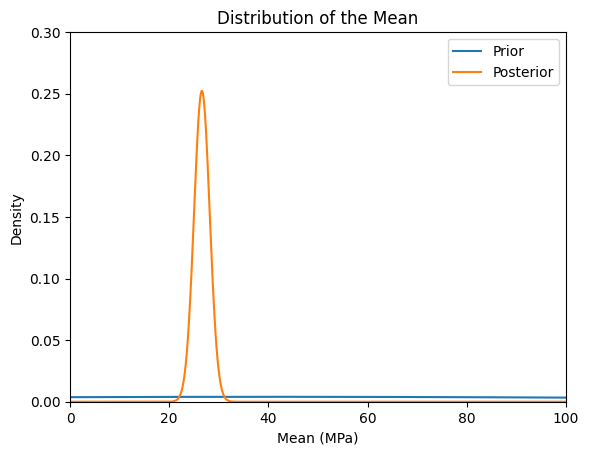

In [4]:
x = np.linspace(0, 100, 1000)
prior = stats.norm.pdf(x, prior_mu_mean, prior_mu_std)
posterior = stats.norm.pdf(x, posterior_mu_mean, posterior_mu_std)

fig, ax = plt.subplots()
ax.plot(x, prior, label="Prior")
ax.plot(x, posterior, label="Posterior")
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.3)
ax.set_xlabel("Mean (MPa)")
ax.set_ylabel("Density")
ax.set_title("Distribution of the Mean")
ax.legend()
plt.show()

:::{note} Complete Code! 📃💻
:class: dropdown
Here’s the complete code that you would run in your PC:

```python

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

std = 5  # MPa
sample = [30.1, 28.7, 21.2, 28.6, 25.8, 25.1, 24.2, 27.3, 20.0, 34.8]  # MPa
n = len(sample)

prior_mu_mean = 40  # MPa
prior_mu_std = 100  # MPa


# Calculate the mean of the sample
mean_sample = np.mean(sample)
print(f"Mean of the sample: {mean_sample:.2f} MPa")

# sttep 3 Posterior distribution with conjugate prior
posterior_mu_mean = (prior_mu_mean * (std ** 2 / n) + mean_sample * prior_mu_std ** 2) / (std ** 2 / n + prior_mu_std ** 2)
posterior_mu_std = np.sqrt(prior_mu_std ** 2 * (std ** 2 / n) / (prior_mu_std ** 2 + std ** 2 / n))
print(f"Posterior mean: {posterior_mu_mean:.2f} MPa")
print(f"Posterior standard deviation: {posterior_mu_std:.2f} MPa")

#plots
x = np.linspace(0, 100, 1000)
prior = stats.norm.pdf(x, prior_mu_mean, prior_mu_std)
posterior = stats.norm.pdf(x, posterior_mu_mean, posterior_mu_std)

fig, ax = plt.subplots()
ax.plot(x, prior, label="Prior")
ax.plot(x, posterior, label="Posterior")
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.3)
ax.set_xlabel("Mean (MPa)")
ax.set_ylabel("Density")
ax.set_title("Distribution of the Mean")
ax.legend()
plt.show()

```
:::

